# **Import and Read Data**

In [5]:
#!pip install indoNLP emoji bertopic hdbscan gensim

In [ ]:
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, RegexpTokenizer
import torch
import tensorflow as tf
import random

In [ ]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
tf.random.set_seed(SEED)

In [ ]:
data = pd.read_csv("/content/filtered_opinion_comments.csv", encoding = "utf-8")
data

,author,comment,likes,is_reply,is_opini
0,@firman.tannady,Kalau ppatk bisa tau angka deposit judol turun...,759,False,True
1,@wahyujatianggara4405,smart sekali haha . mereka bisa tau karena mer...,83,True,True
2,@h.adiwangsawangsa1665,Lebih selekttif …. Jangan asal Blokir ….. dica...,0,False,True
3,@KandoAli,Makin gila' tarik semua uang yg di Bank biar B...,0,False,True
4,@setiasetiawan-q2l,"Mereka membekukan,uang kita itu buat modal dul...",0,False,True
...,...,...,...,...,...
2842,@kanayama90,"Agak susah mas,, saya dulu pernah main, scan Q...",1,True,True
2843,@udin_pekok,"Kalo blokir judol, narkoboy, koruptor sih oke ...",17,False,True
2844,@zulfanirich7594,KALO SAMA BANDAR JUDINYA SI DEWA LANGSUNG LUMP...,2,True,True
2845,@anakrantaukyj9106,Mungkin tujuan nya buat menghindari rekening y...,5,False,True


# **Preprocessing Data**

In [ ]:
from indoNLP.preprocessing import replace_slang
import emoji
import re
import string

def cleaning(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)  # hapus URL
    text = re.sub(r'@\w+', '', text)              # hapus mention
    text = re.sub(r'#', '', text)                 # hapus simbol #
    text = emoji.replace_emoji(text, replace='')  # hapus emoji
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()      # hapus spasi berlebih
    text = text.lower()                           # ubah ke huruf kecil
    text = replace_slang(text)  # Normalisasi slang: gk → nggak, bgt → banget
    return text

df = pd.DataFrame()
df['text'] = data['comment'].apply(cleaning)
print(df['text'])

0       kalau ppatk bisa tau angka deposit judol turun...
1       smart sekali haha mereka bisa tau karena merek...
2       lebih selekttif … jangan asal blokir … dicaril...
3       makin gila tarik semua uang yang di bank biar ...
4       mereka membekukanuang kita itu buat modal dulu...
                              ...                        
2842    agak susah mas saya dulu pernah main scan qrny...
2843    kalo blokir judol narkoboy koruptor sih oke cu...
2844    kalo sama bandar judinya sih dewa langsung lum...
2845    mungkin tujuan nya buat menghindari rekening y...
2846    masalahnya pendapatan judol itu sendiri masif ...
Name: text, Length: 2847, dtype: object


# **Topic Modeling**

In [ ]:
#!pip install sentence-transformers umap-learn tf-keras

In [ ]:
'''
embedding_model.eval()
embeddings = embedding_model.encode(docs, convert_to_numpy=True)
np.save("my_embeddings.npy", embeddings)
embeddings = np.load("my_embeddings.npy")
topics, probs = topic_model.fit_transform(docs, embeddings)
'''

'\nembedding_model.eval()\nembeddings = embedding_model.encode(docs, convert_to_numpy=True)\nnp.save("my_embeddings.npy", embeddings)\nembeddings = np.load("my_embeddings.npy")\ntopics, probs = topic_model.fit_transform(docs, embeddings)\n'

In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic.representation import MaximalMarginalRelevance
from bertopic import BERTopic
import umap.umap_ as umap
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer("denaya/indoSBERT-large")
embeddings = np.load("my_embeddings.npy")
umap_model = umap.UMAP(n_neighbors=44, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=9, prediction_data=True)


topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Cetak objeknya untuk melihat semua komponen
print(topic_model)

docs = df['text'].tolist()
topics, probs = topic_model.fit_transform(docs, embeddings)
topic_model.get_topic_info()


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

2025-08-07 05:55:53,277 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


BERTopic(calculate_probabilities=False, ctfidf_model=ClassTfidfTransformer(...), embedding_model=SentenceTransformer(...), hdbscan_model=HDBSCAN(...), language=None, low_memory=False, min_topic_size=10, n_gram_range=(1, 1), nr_topics=None, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=True, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)


2025-08-07 05:56:20,688 - BERTopic - Dimensionality - Completed ✓
2025-08-07 05:56:20,689 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-07 05:56:20,810 - BERTopic - Cluster - Completed ✓
2025-08-07 05:56:20,828 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-07 05:56:20,927 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,67,-1_dan_ppatk_yang_bank,"[dan, ppatk, yang, bank, sudah, enggak, ini, s...",[dari ucapan dan tindakan saja sudah kontradik...
1,0,2647,0_yang_di_ppatk_rekening,"[yang, di, ppatk, rekening, enggak, dan, itu, ...",[menurut pendapat syppatk itu tujuan nya biar ...
2,1,69,1_bulan_rekening_yang_di,"[bulan, rekening, yang, di, transaksi, enggak,...",[kalau buat depo kan artinya rekening aktif ad...
3,2,29,2_konoha_pejabat_pejabat2_rakyat,"[konoha, pejabat, pejabat2, rakyat, yang, nega...",[pejabat perampok rakyat makin hancur konoha g...
4,3,23,3_70_turun_judol_itu,"[70, turun, judol, itu, rekening, kalau, tau, ...",[kalo ppatk tau judol turun 70 berarti dia tau...
5,4,12,4_bank_gara_ppatk_percaya,"[bank, gara, ppatk, percaya, lu, runtuh, terja...",[ppatk adalah lembaga independen non pemerinta...


In [ ]:
'''
# Reduce outliers
new_topics = topic_model.reduce_outliers(docs, topics)
topic_model.update_topics(docs, topics=new_topics)
topic_model.get_topic_info()
'''

'\n# Reduce outliers\nnew_topics = topic_model.reduce_outliers(docs, topics)\ntopic_model.update_topics(docs, topics=new_topics)\ntopic_model.get_topic_info()\n'

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_documents(docs)

In [ ]:
fig = topic_model.visualize_heatmap()

fig.update_traces(
    texttemplate="%{z:.2f}",
    textfont={"size": 12},
    showscale=True
)

fig.show()

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Preprocessing dokumen
cleaned_docs = topic_model._preprocess_text(docs)

# Tokenisasi
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()
tokens = [tokenizer(doc) for doc in cleaned_docs]

# Dictionary dan Corpus
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Step 4: Ambil daftar kata dari tiap topik
words = vectorizer.get_feature_names_out()
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluasi Coherence Score (c_v)
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokens,
    corpus=corpus,
    dictionary=dictionary,
    coherence='c_v'
)
coherence = coherence_model.get_coherence()

print(f"✅ Coherence Score (c_v): {coherence:.4f}")

✅ Coherence Score (c_v): 0.4438


# **Representasi Topik**

In [ ]:
from bertopic.representation import KeyBERTInspired

representation_model = KeyBERTInspired()
topic_model.update_topics(docs, representation_model=representation_model)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,67,-1_cekrekening_ppatk_bank_nabung,"[cekrekening, ppatk, bank, nabung, perbankan, ...",[dari ucapan dan tindakan saja sudah kontradik...
1,0,2647,0_ppatk_nabung_bank_rekening,"[ppatk, nabung, bank, rekening, transaksi, blo...",[menurut pendapat syppatk itu tujuan nya biar ...
2,1,69,1_3bulan_rekeningku_bayar_nganggur,"[3bulan, rekeningku, bayar, nganggur, nabung, ...",[kalau buat depo kan artinya rekening aktif ad...
3,2,29,2_konohasiapa_konoha_konohakoruptor_pejabat2,"[konohasiapa, konoha, konohakoruptor, pejabat2...",[pejabat perampok rakyat makin hancur konoha g...
4,3,23,3_70_ppatk_rekeningnya_gblk,"[70, ppatk, rekeningnya, gblk, transaksinya, b...",[kalo ppatk tau judol turun 70 berarti dia tau...
5,4,12,4_ppatk_drastisbangsat_hancurnya_collapse,"[ppatk, drastisbangsat, hancurnya, collapse, b...",[ppatk adalah lembaga independen non pemerinta...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Topic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Topic', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Topic', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Topic', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Count', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
fig = topic_model.visualize_heatmap()

fig.update_traces(
    texttemplate="%{z:.2f}",
    textfont={"size": 12},
    showscale=True
)

fig.show()

In [ ]:
topic_model.visualize_documents(docs)

In [ ]:
topic_model.visualize_barchart()

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Preprocessing dokumen
cleaned_docs = topic_model._preprocess_text(docs)

# Tokenisasi
vectorizer = topic_model.vectorizer_model
tokenizer = vectorizer.build_tokenizer()
tokens = [tokenizer(doc) for doc in cleaned_docs]

# Dictionary dan Corpus
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Ambil daftar kata dari tiap topik
words = vectorizer.get_feature_names_out()
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluasi Coherence Score (c_v)
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokens,
    corpus=corpus,
    dictionary=dictionary,
    coherence='c_v'
)
coherence = coherence_model.get_coherence()

print(f"✅ Coherence Score (c_v): {coherence:.4f}")

✅ Coherence Score (c_v): 0.3512


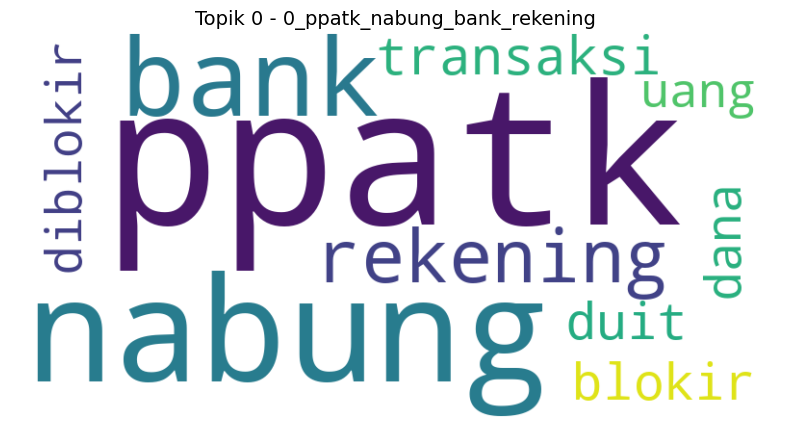

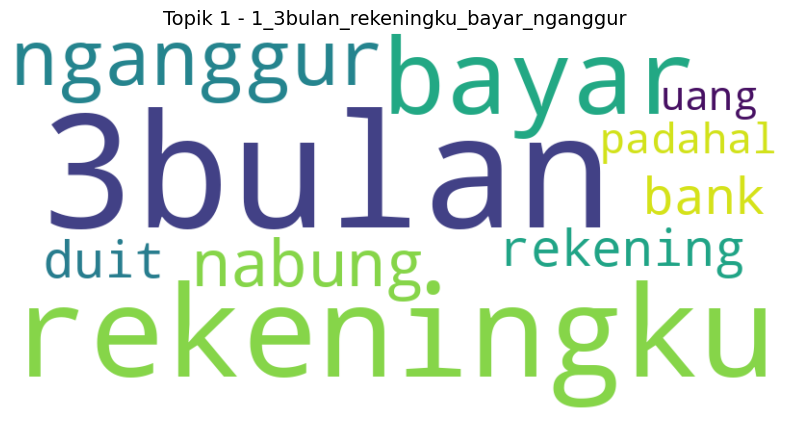

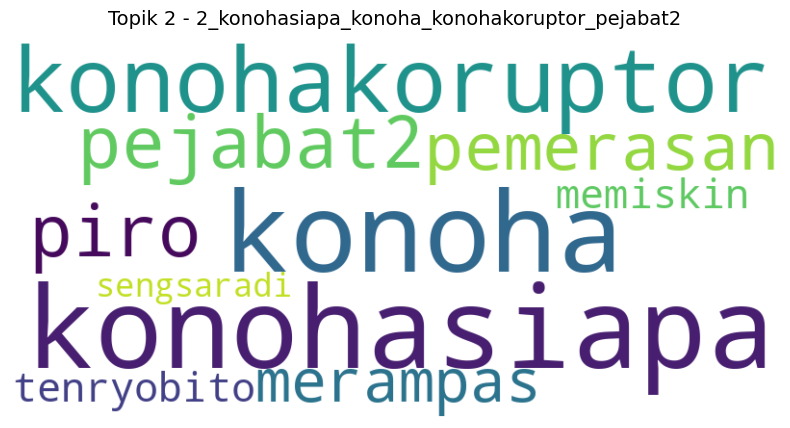

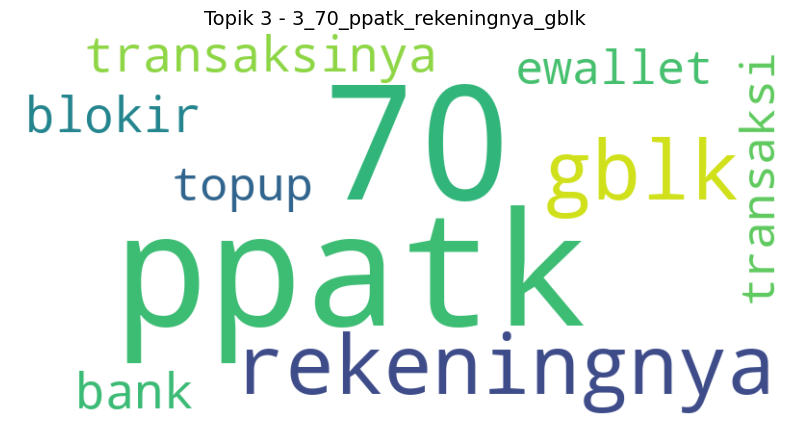

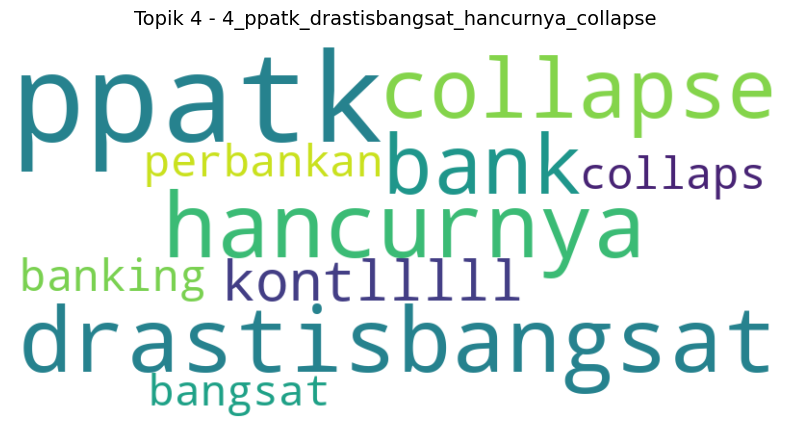

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ambil semua topik dari model
topics_info = topic_model.get_topic_info()

# Buat WordCloud untuk setiap topik kecuali -1
for topic_id in topics_info.Topic:
    if topic_id == -1:
        continue

    topic_words = topic_model.get_topic(topic_id)

    word_freq = {word: weight for word, weight in topic_words}

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=50
    ).generate_from_frequencies(word_freq)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topik {topic_id} - {topics_info[topics_info.Topic == topic_id].Name.values[0]}", fontsize=14)
    plt.show()

Progres

In [ ]:
# Embedding dokumen secara manual
embed_manual = embedding_model.encode(docs, show_progress_bar=True)
embed_manual

Batches:   0%|          | 0/89 [00:00<?, ?it/s]

array([[-1.44839600e-01, -3.07193339e-01, -5.29130101e-01, ...,
         2.19357610e-01, -5.64325213e-01,  1.97760582e-01],
       [-2.79070467e-01, -3.06196362e-01,  3.01591426e-01, ...,
         1.62141055e-01, -2.27263823e-01, -4.42788869e-01],
       [-2.61666805e-01, -3.71341467e-01, -8.10371116e-02, ...,
         3.25146824e-01, -2.64155626e-01,  1.47663698e-01],
       ...,
       [ 1.13449678e-01, -1.53137863e-01,  4.81135488e-01, ...,
        -2.94095218e-01, -4.78193790e-01, -3.73273127e-04],
       [-4.14762825e-01,  1.00212999e-01, -6.57995105e-01, ...,
         2.11955085e-01, -3.40900093e-01,  2.64270127e-01],
       [ 2.90414572e-01, -5.48260450e-01, -4.22869891e-01, ...,
         8.05697367e-02, -2.41100699e-01,  1.13879584e-01]], dtype=float32)

In [ ]:
reduced_embeddings = umap_model.fit_transform(embeddings)
reduced_embeddings

array([[ 4.1218305,  9.146527 ],
       [ 7.3474603,  8.018975 ],
       [ 8.287992 , 10.737037 ],
       ...,
       [ 6.395859 ,  8.845315 ],
       [ 6.1808066,  9.224221 ],
       [ 6.0288205,  9.06183  ]], dtype=float32)